## Creating CNN Using Transfer Learning 

#### Malaria prediction Using Deep Learning  

In [63]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [64]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [65]:
## resize all the images to do this
IMAGE_SIZE=[224,224]  ## height and width  3-depth
train_path="C:/Users/truna/OneDrive/Documents/cell_images/train"
valid_path="C:/Users/truna/OneDrive/Documents/cell_images/test"

In [66]:
## import the vgg16 library as shown below and preprocessing layer to the
## here we will be using imagenet weights
vgg19=VGG19(input_shape=IMAGE_SIZE + [3], weights="imagenet",include_top=False)


In [67]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [68]:
## don't train existing weight
for layer in vgg19.layers:
    layer.trainable=False

In [69]:
### usefull for getting number of output classes
folders=glob("C:/Users/truna/OneDrive/Documents/cell_images/train/*")

In [70]:
folders

['C:/Users/truna/OneDrive/Documents/cell_images/train\\parasitized',
 'C:/Users/truna/OneDrive/Documents/cell_images/train\\uninfected']

In [71]:
## our layers- you can add more if you want
x=Flatten()(vgg19.output)

In [72]:
prediction=Dense(len(folders),activation='softmax')(x)
## create a model object
model=Model(inputs=vgg19.input,outputs=prediction)


In [73]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [74]:
## tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [75]:
## use the image data generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [76]:
## make sure you provided the same target size as initialied for the image
training_set = train_datagen.flow_from_directory("C:/Users/truna/OneDrive/Documents/cell_images/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 400 images belonging to 2 classes.


In [77]:
training_set

In [78]:
test_set = test_datagen.flow_from_directory("C:/Users/truna/OneDrive/Documents/cell_images/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 232 images belonging to 2 classes.


In [79]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\truna\AppData\Local\Temp/ipykernel_196484/2500947124.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
13/13 [==============================] - 175s 14s/step - loss: 1.4198 - accuracy: 0.5525 - val_loss: 1.3240 - val_accuracy: 0.5043
Epoch 2/30
13/13 [==============================] - 169s 13s/step - loss: 0.6395 - accuracy: 0.6700 - val_loss: 0.5081 - val_accuracy: 0.7414
Epoch 3/30
13/13 [==============================] - 169s 13s/step - loss: 0.5195 - accuracy: 0.7500 - val_loss: 0.4168 - val_accuracy: 0.8147
Epoch 4/30
13/13 [==============================] - 169s 13s/step - loss: 0.4036 - accuracy: 0.8250 - val_loss: 0.4661 - val_accuracy: 0.7672
Epoch 5/30
13/13 [==============================] - 166s 13s/step - loss: 0.3142 - accuracy: 0.8850 - val_loss: 0.4029 - val_accuracy: 0.8534
Epoch 6/30
13/13 [==============================] - 162s 13s/step - loss: 0.3481 - accuracy: 0.8325 - val_loss: 0.3572 - val_accuracy: 0.8276
Epoch 7/30
13/13 [==============================] - 166s 13s/step - loss: 0.2705 - accuracy: 0.8925 - val_loss: 0.3896 - val_accuracy: 0.8233
Epoch 

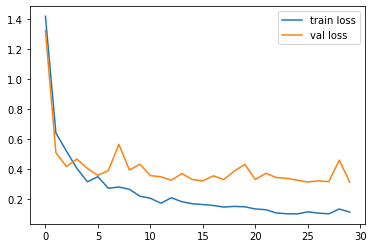

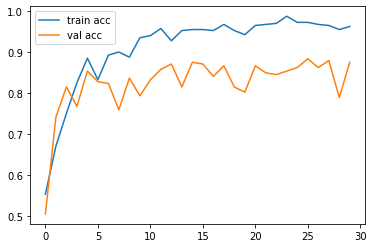

<Figure size 432x288 with 0 Axes>

In [80]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [81]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [82]:
y_pred = model.predict(test_set)

8/8 [==============================] - 56s 7s/step


In [83]:
y_pred

array([[8.54815066e-01, 1.45184904e-01],
       [1.47237584e-01, 8.52762341e-01],
       [9.12097096e-01, 8.79029334e-02],
       [2.86654066e-02, 9.71334636e-01],
       [6.25695944e-01, 3.74304056e-01],
       [3.51579897e-02, 9.64842081e-01],
       [9.91411686e-01, 8.58824514e-03],
       [4.98215333e-02, 9.50178504e-01],
       [3.62672269e-01, 6.37327731e-01],
       [9.96792853e-01, 3.20713851e-03],
       [2.42438428e-02, 9.75756168e-01],
       [9.31769609e-01, 6.82303682e-02],
       [7.44223595e-02, 9.25577641e-01],
       [6.66239262e-01, 3.33760768e-01],
       [9.99652743e-01, 3.47206602e-04],
       [2.05129273e-02, 9.79487002e-01],
       [1.54257312e-01, 8.45742702e-01],
       [2.43671656e-01, 7.56328344e-01],
       [9.95340824e-01, 4.65918379e-03],
       [9.97268081e-01, 2.73192162e-03],
       [9.99592960e-01, 4.07009153e-04],
       [9.92260993e-01, 7.73900887e-03],
       [2.57823970e-02, 9.74217594e-01],
       [6.92993224e-01, 3.07006747e-01],
       [2.752792

In [84]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [85]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [86]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [87]:
model=load_model('model_vgg19.h5')

### Make prediction for New data 

In [104]:
img=image.load_img("C:/Users/truna/OneDrive/Documents/cell_images/test/uninfected/C214ThinF_IMG_20151106_115440_cell_72.png",target_size=(224,224))

In [105]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [106]:
x.shape

(224, 224, 3)

In [107]:
x=x/255

In [108]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [111]:
model.predict(img_data)

1/1 [==============================] - 0s 212ms/step


array([[8.063953e-05, 9.999193e-01]], dtype=float32)

In [112]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 204ms/step


In [113]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
